<a href="https://colab.research.google.com/github/maximusdecimusmeridiu/Random-Walk-Ai-/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/dataset.csv'
dataset = pd.read_csv(file_path)

# Step 1: Handle missing values in numerical columns using median
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_columns:
    dataset[col].fillna(dataset[col].median(), inplace=True)

# Step 2: Handle missing values in the 'sex' column by imputing as 'Unknown'
dataset['sex'].fillna('Unknown', inplace=True)

# Step 3: Check and Treat Outliers in 'body_mass_g' (values beyond 3 standard deviations from the mean)
mean_mass = dataset['body_mass_g'].mean()
std_mass = dataset['body_mass_g'].std()
outlier_threshold = 3 * std_mass
dataset = dataset[(dataset['body_mass_g'] >= (mean_mass - outlier_threshold)) &
                  (dataset['body_mass_g'] <= (mean_mass + outlier_threshold))]

# Display basic cleaned dataset info
print("Missing Values After Cleaning:")
print(dataset.isnull().sum())
print("\nSample Cleaned Data:")
print(dataset.head())
print("\nData Summary After Cleaning:")
print(dataset.describe(include='all'))

# Save the cleaned dataset
cleaned_file_path = '/content/dataset.csv'
dataset.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Missing Values After Cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Sample Cleaned Data:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            44.1           17.3              197.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g      sex  
0       3750.0     male  
1       3800.0   female  
2       3250.0   female  
3       4050.0  Unknown  
4       3450.0   female  

Data Summary After Cleaning:
       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      341     341      341.000000     341.000000         341.

<ipython-input-2-5e6384bfbdb1>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
<ipython-input-2-5e6384bfbdb1>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
gentoo_avg_body_mass = dataset[dataset['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body mass for Gentoo penguins: {gentoo_avg_body_mass:.2f} grams")

Average body mass for Gentoo penguins: 5069.11 grams


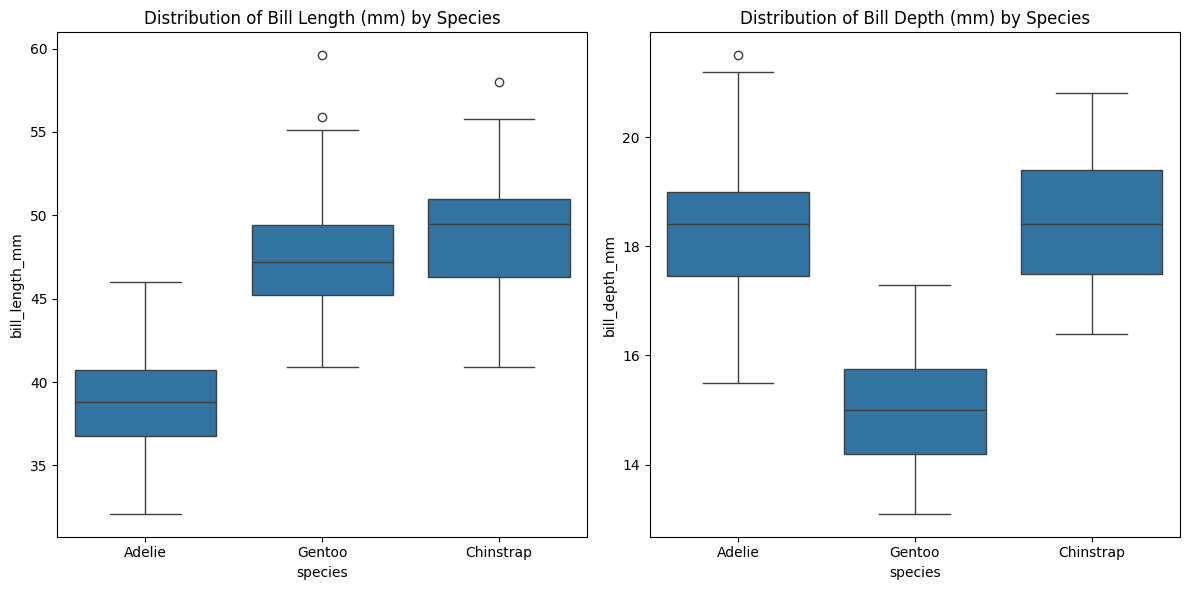

{'bill_length_mm': {'skewness': {'Adelie': 0.10675847009386183,
   'Chinstrap': -0.06564211349033176,
   'Gentoo': 0.7119641062214143},
  'kurtosis': {'Adelie': -0.3004432769595762,
   'Chinstrap': -0.11590455618395401,
   'Gentoo': 1.1421635719631702}},
 'bill_depth_mm': {'skewness': {'Adelie': 0.3376983695949997,
   'Chinstrap': 0.017486927346921474,
   'Gentoo': 0.3336398163554058},
  'kurtosis': {'Adelie': -0.10317688826381399,
   'Chinstrap': -0.9257154728100807,
   'Gentoo': -0.5974105020570377}}}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Set up the plot for bill_length_mm and bill_depth_mm distribution
plt.figure(figsize=(12, 6))

# Plot the distribution of 'bill_length_mm' across species
plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=dataset)
plt.title('Distribution of Bill Length (mm) by Species')

# Plot the distribution of 'bill_depth_mm' across species
plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=dataset)
plt.title('Distribution of Bill Depth (mm) by Species')

plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for each species for 'bill_length_mm' and 'bill_depth_mm'
features = ['bill_length_mm', 'bill_depth_mm']
species_groups = dataset.groupby('species')

skewness_kurtosis = {}

for feature in features:
    skewness_kurtosis[feature] = {
        'skewness': {},
        'kurtosis': {}
    }

    for species, group in species_groups:
        skewness_kurtosis[feature]['skewness'][species] = skew(group[feature])
        skewness_kurtosis[feature]['kurtosis'][species] = kurtosis(group[feature])

# Display skewness and kurtosis results
skewness_kurtosis


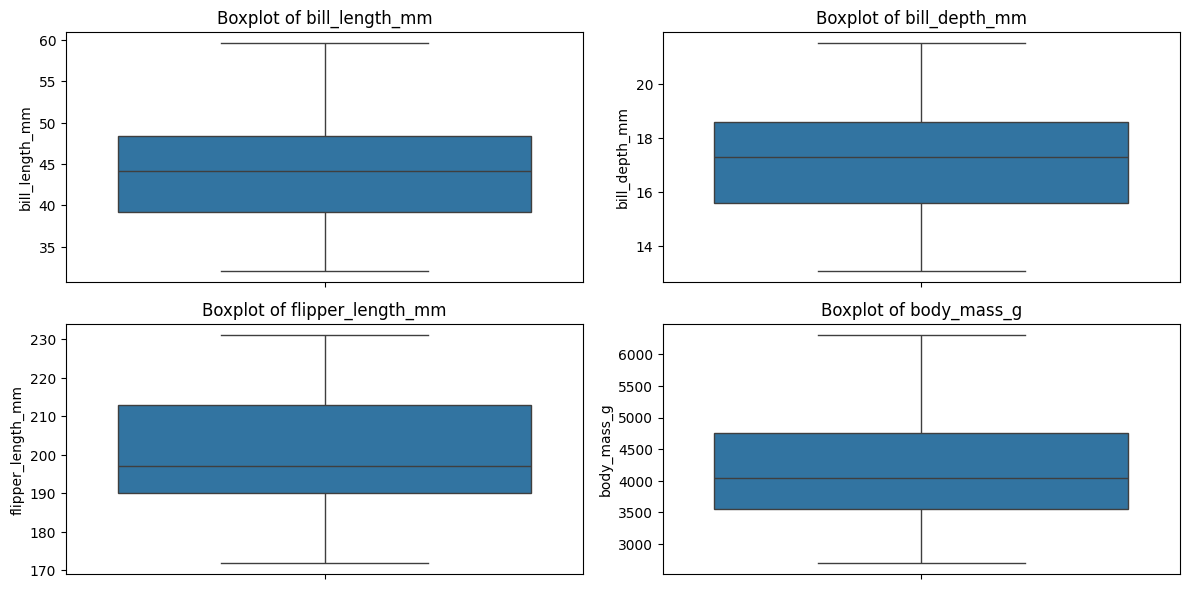

{'bill_length_mm': {'Lower Bound': 25.40000000000001,
  'Upper Bound': 62.19999999999999,
  'Outliers Count': 0,
  'Outliers Percentage': 0.0},
 'bill_depth_mm': {'Lower Bound': 11.099999999999998,
  'Upper Bound': 23.100000000000005,
  'Outliers Count': 0,
  'Outliers Percentage': 0.0},
 'flipper_length_mm': {'Lower Bound': 155.5,
  'Upper Bound': 247.5,
  'Outliers Count': 0,
  'Outliers Percentage': 0.0},
 'body_mass_g': {'Lower Bound': 1750.0,
  'Upper Bound': 6550.0,
  'Outliers Count': 0,
  'Outliers Percentage': 0.0}}

In [ ]:
import matplotlib.pyplot as plt

# Define numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Initialize a dictionary to store outlier information
outlier_info = {}

# Identify outliers using the IQR method
for feature in numerical_features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[feature] < lower_bound) | (dataset[feature] > upper_bound)]

    # Store outlier details
    outlier_info[feature] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': len(outliers),
        'Outliers Percentage': (len(outliers) / len(dataset)) * 100
    }

# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=dataset[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Display outlier information
outlier_info


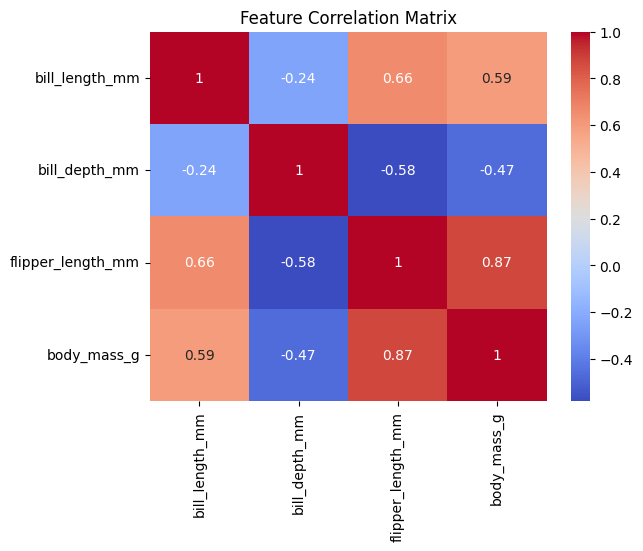

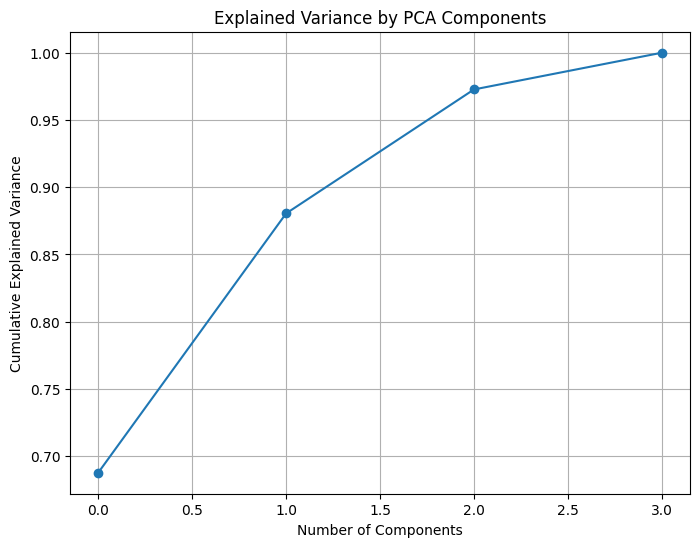

Number of components to retain 95% variance: 3


(array([[-1.8419288 ,  0.05723821, -0.22565657],
        [-1.30404177, -0.42159012, -0.02406163],
        [-1.36609151, -0.14634619,  0.20377569],
        [-0.27328859,  0.07132978,  0.17679729],
        [-1.87837941,  0.00983284, -0.61618052]]),
 array([0.68768469, 0.19278764, 0.09221582, 0.02731186]))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Select numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data_numerical = dataset[numerical_features]

# Step 1: Check for correlations
correlation_matrix = data_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numerical)

# Step 3: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

# Step 4: Choose the number of components that explain 95% of the variance
n_components_95 = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

# Transform data with the selected number of components
pca_selected = PCA(n_components=n_components_95)
reduced_data = pca_selected.fit_transform(scaled_data)

# Output the reduced data and explained variance
reduced_data[:5], explained_variance


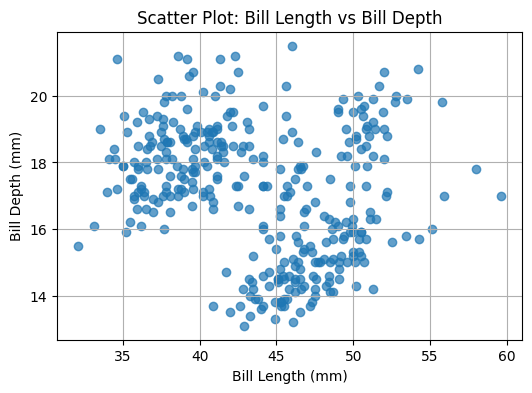

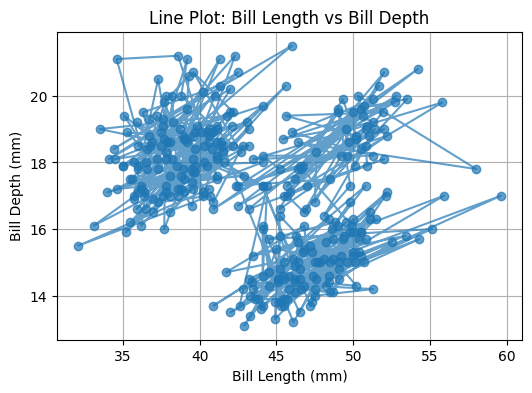

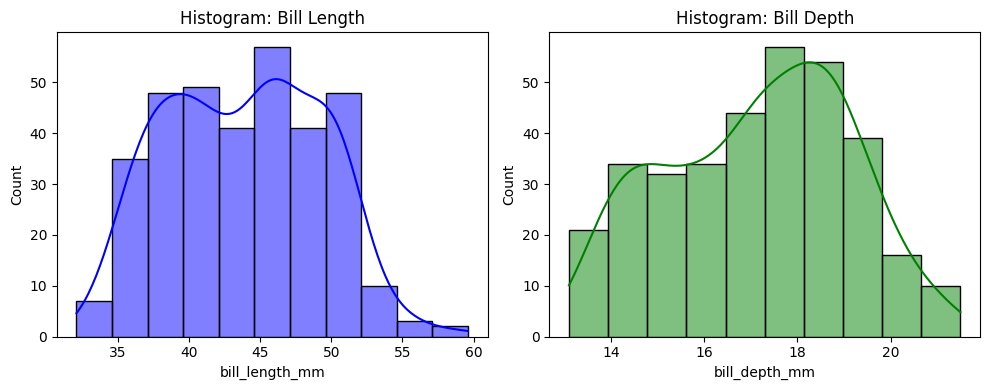

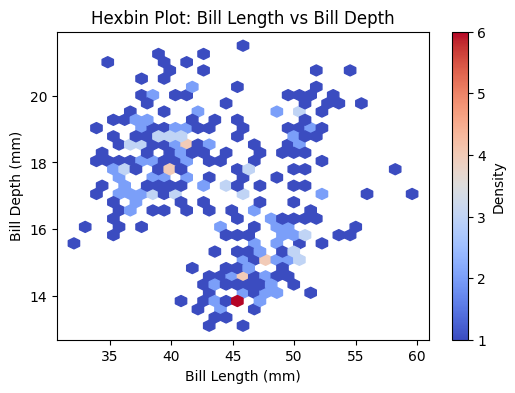

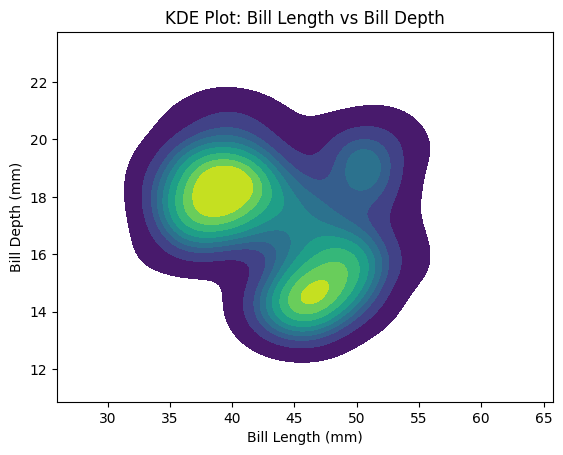

<ipython-input-7-783770fee2b4>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['species'], y=dataset['bill_length_mm'], palette='pastel')
<ipython-input-7-783770fee2b4>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['species'], y=dataset['bill_depth_mm'], palette='muted')


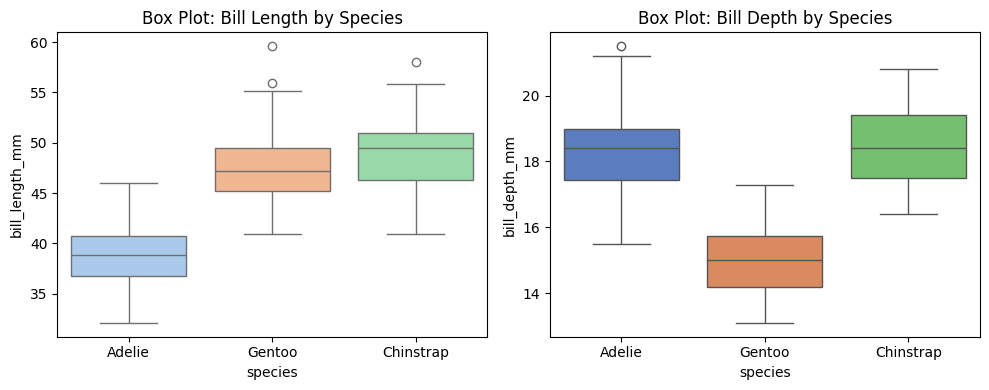

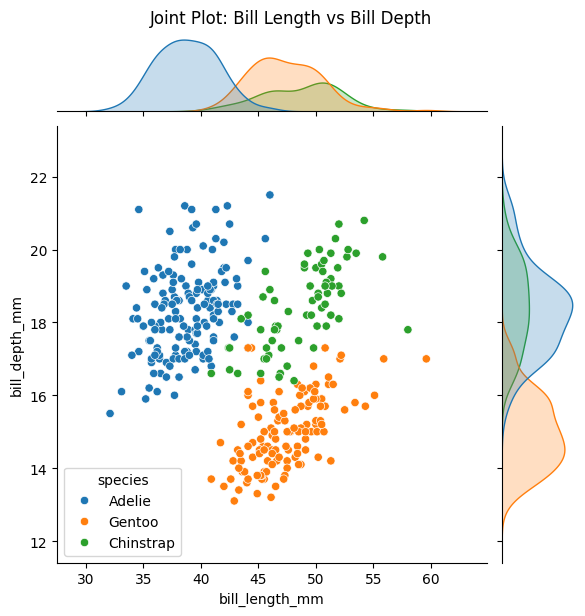

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(dataset['bill_length_mm'], dataset['bill_depth_mm'], alpha=0.7)
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

# Line Plot
plt.figure(figsize=(6, 4))
plt.plot(dataset['bill_length_mm'], dataset['bill_depth_mm'], linestyle='-', marker='o', alpha=0.7)
plt.title('Line Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

# Histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(dataset['bill_length_mm'], kde=True, color='blue')
plt.title('Histogram: Bill Length')

plt.subplot(1, 2, 2)
sns.histplot(dataset['bill_depth_mm'], kde=True, color='green')
plt.title('Histogram: Bill Depth')

plt.tight_layout()
plt.show()

# Hexbin Plot
plt.figure(figsize=(6, 4))
plt.hexbin(dataset['bill_length_mm'], dataset['bill_depth_mm'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Density')
plt.title('Hexbin Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# KDE Plot
sns.kdeplot(x=dataset['bill_length_mm'], y=dataset['bill_depth_mm'], cmap='viridis', fill=True)
plt.title('KDE Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Box Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=dataset['species'], y=dataset['bill_length_mm'], palette='pastel')
plt.title('Box Plot: Bill Length by Species')

plt.subplot(1, 2, 2)
sns.boxplot(x=dataset['species'], y=dataset['bill_depth_mm'], palette='muted')
plt.title('Box Plot: Bill Depth by Species')

plt.tight_layout()
plt.show()

# Joint Plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=dataset, kind='scatter', hue='species', palette='tab10')
plt.suptitle('Joint Plot: Bill Length vs Bill Depth', y=1.02)
plt.show()


In [ ]:
# Group by species and island, then find the maximum flipper length
max_flipper_length = dataset.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Find the species with the longest flippers on each island
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

# Display the result
longest_flippers


,species,island,flipper_length_mm
4,Gentoo,Biscoe,231.0
3,Chinstrap,Dream,212.0
2,Adelie,Torgersen,210.0


In [ ]:
from scipy.stats import zscore

# Select numerical features for normalization
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Apply Z-score normalization (standardization)
dataset[numerical_features] = dataset[numerical_features].apply(zscore)

# Display the first few rows of the normalized data
dataset.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.875641,0.788528,-1.419612,-0.565065,male
1,Adelie,Torgersen,-0.801837,0.126994,-1.062878,-0.502525,female
2,Adelie,Torgersen,-0.654229,0.432317,-0.420757,-1.190470,female
3,Adelie,Torgersen,0.046912,0.076107,-0.278064,-0.189822,Unknown
4,Adelie,Torgersen,-1.318467,1.093851,-0.563451,-0.940308,female


# New Section